# Happiness Report
### ======================================================================================

### Attribute Information:

- CountryName - of the country.


- RegionRegion - the country belongs to.


- Happiness Rank - Rank of the country based on the Happiness Score.


- Happiness Score - A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."


- Standard Error - The standard error of the happiness score.


- Economy (GDP per Capita) - The extent to which GDP contributes to the calculation of the Happiness Score.


- Family - The extent to which Family contributes to the calculation of the Happiness Score


- Health (Life Expectancy) - The extent to which Life expectancy contributed to the calculation of the Happiness Score


- Freedom - The extent to which Freedom contributed to the calculation of the Happiness Score.


- Trust (Government Corruption) - The extent to which Perception of Corruption contributes to Happiness Score.


- Generosity - The extent to which Generosity contributed to the calculation of the Happiness Score.


- Dystopia Residual - The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.

### ======================================================================================

### Reading the data and checking basic measures

In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

C:\Users\obero\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\obero\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\obero\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.txa6yqsd3gcqqc22geq54j2udcxdxhwn.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
#Reading in the dataset and checking its head
df_2015 = pd.read_csv('2015.csv')
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
#Checking the info of the dataset
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [4]:
#Checking the stats of the dataset using describe command
df_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [5]:
#Checking the shape of the dataset
df_2015.shape

(158, 12)

### Exploratory Data Analysis

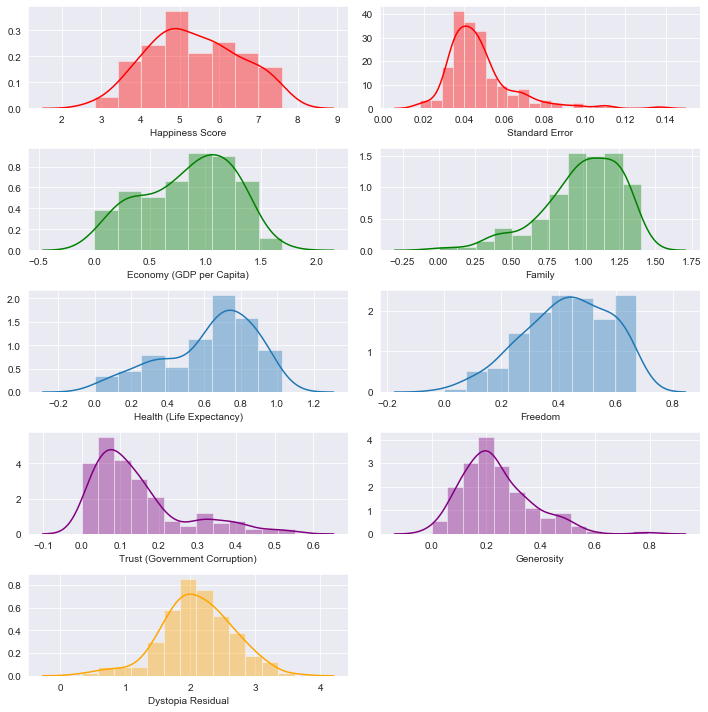

In [6]:
#Distribution plot for all the columns of the dataset to understand how our data is skewed and what the kurtosis is for each column
fig,ax = plt.subplots(5,2,figsize = (10,10))
fig.delaxes(ax[-1,-1])

sns.distplot(df_2015['Happiness Score'],ax = ax[0,0],color = 'Red')
sns.distplot(df_2015['Standard Error'],ax = ax[0,1],color = 'Red')
sns.distplot(df_2015['Economy (GDP per Capita)'],ax = ax[1,0],color = 'Green')
sns.distplot(df_2015['Family'],ax = ax[1,1],color = 'Green')
sns.distplot(df_2015['Health (Life Expectancy)'],ax = ax[2,0])
sns.distplot(df_2015['Freedom'],ax = ax[2,1])
sns.distplot(df_2015['Trust (Government Corruption)'],ax = ax[3,0],color = 'Purple')
sns.distplot(df_2015['Generosity'],ax = ax[3,1],color= 'Purple')
sns.distplot(df_2015['Dystopia Residual'],ax = ax[4,0],color = 'Orange')

plt.tight_layout();

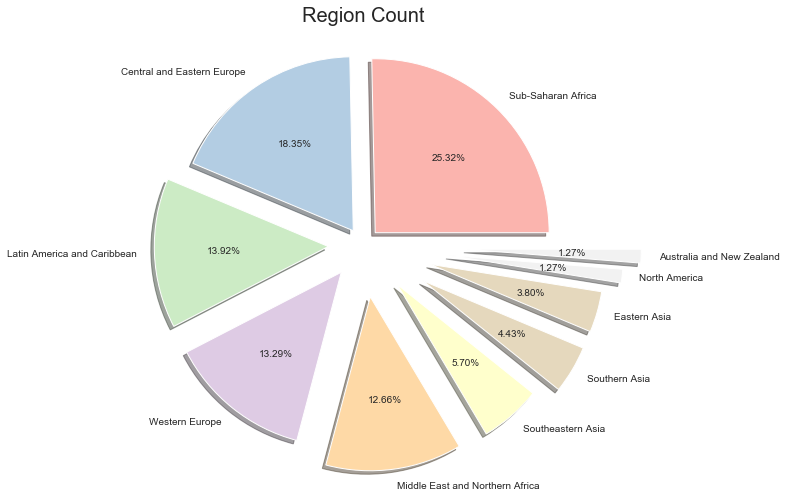

In [7]:
#Region wise pie plot to see how our data is distributed
df_2015['Region'].value_counts().plot.pie(autopct = '%.2f%%',figsize = (8,8),explode = [0.1,0.1,0.2,0.2,0.3,0.3,0.4,0.4,0.5,0.6],cmap = 'Pastel1',shadow = True)
plt.title('Region Count',size = 20)
plt.ylabel(' ');

In [8]:
#Grouping our data by Region on the basis of mean 
by_region = df_2015.groupby('Region').mean()

In [9]:
#Checking the dataset
by_region

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980009
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Sub-Saharan Africa,127.900000,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980


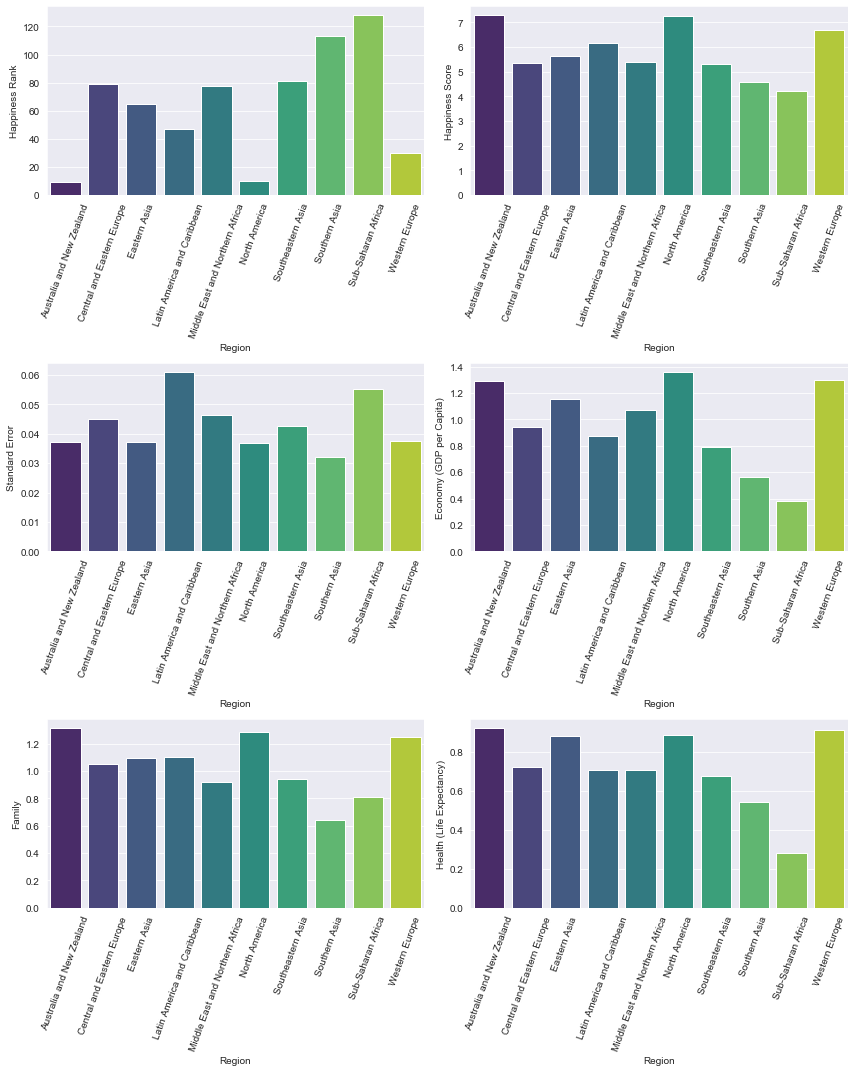

In [10]:
#Region wise barplot for each column
fig,ax=plt.subplots(3,2,figsize=(12,15))

for i,cols in enumerate(['Happiness Rank', 'Happiness Score', 'Standard Error','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)']):
    sns.barplot(x= by_region.index ,y = cols,data = by_region,ax=ax[i//2,i%2],palette = 'viridis')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=70)
plt.tight_layout();

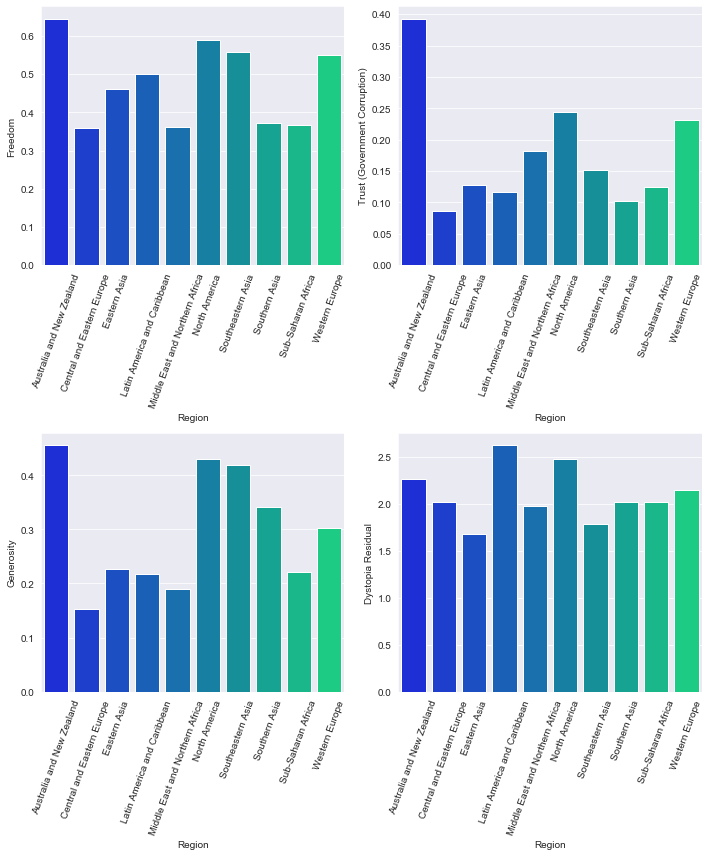

In [11]:
#Region wise barplot for each column
fig,ax=plt.subplots(2,2,figsize=(10,12))

for i,cols in enumerate(['Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']):
    sns.barplot(x= by_region.index ,y = cols,data = by_region,ax=ax[i//2,i%2],palette = 'winter')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=70)
plt.tight_layout();

In [12]:
#Now to create an interactive visualization on the basis of Happiness Score and Country
df = df_2015[['Country','Happiness Score']]

In [13]:
#Basic properties of the mapping
data = dict(
        type = 'choropleth',
        locations = df['Country'],
        locationmode='country names',
        z = df['Happiness Score'],
        text = df['Country'],
        colorscale = 'Blackbody',
        colorbar = {'title' : 'Score out of 10'},
      ) 

In [14]:
#Basic layout of the mapping
layout = dict(
    title = 'Global Happiness 2015 Scores',
    geo = dict(
        showframe = False,
        projection = {'type':'natural earth'}
    )
)

In [15]:
#Plotting the world map
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

### Data Cleaning and Preprocessing

In [16]:
#Checking the kurtosis for each column
df_2015.kurtosis()

Happiness Rank                  -1.199932
Happiness Score                 -0.776075
Standard Error                   5.989346
Economy (GDP per Capita)        -0.866986
Family                           0.918819
Health (Life Expectancy)        -0.393935
Freedom                         -0.460778
Trust (Government Corruption)    1.384787
Generosity                       1.746528
Dystopia Residual                0.534121
dtype: float64

In [17]:
#Checking the skewness for each column
df_2015.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

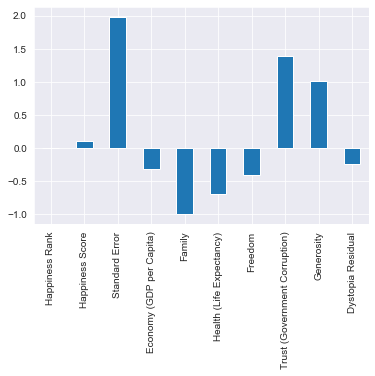

In [18]:
#Plotting the skewness
df_2015.skew().plot.bar();

In [19]:
#Correcting the skewness with functions

#For positive skewness
def cuberoot(param):
    param = param**(1/3)
    return param

#For negative skewness
def square(param):
    param = param**2
    return param

In [20]:
#Applying the skewness correction function according to type of skewness(negative or positive)

df_2015['Standard Error'] = df_2015['Standard Error'].apply(cuberoot)
df_2015['Trust (Government Corruption)'] = df_2015['Trust (Government Corruption)'].apply(cuberoot)
df_2015['Generosity'] = df_2015['Generosity'].apply(cuberoot)
df_2015['Family'] = df_2015['Family'].apply(square)
df_2015['Health (Life Expectancy)'] = df_2015['Health (Life Expectancy)'].apply(square)

In [21]:
#Checking the new skewness
df_2015.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   0.979748
Economy (GDP per Capita)        -0.317575
Family                          -0.255728
Health (Life Expectancy)        -0.014063
Freedom                         -0.413462
Trust (Government Corruption)    0.011932
Generosity                      -0.961079
Dystopia Residual               -0.238911
dtype: float64

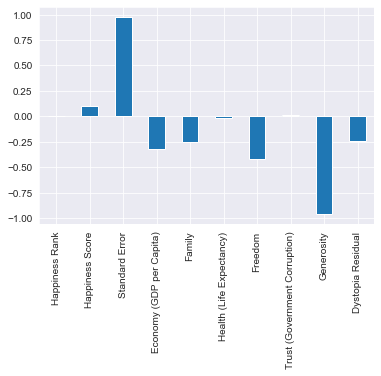

In [22]:
#Plotting the new skewness which is much lesser than before
df_2015.skew().plot.bar();

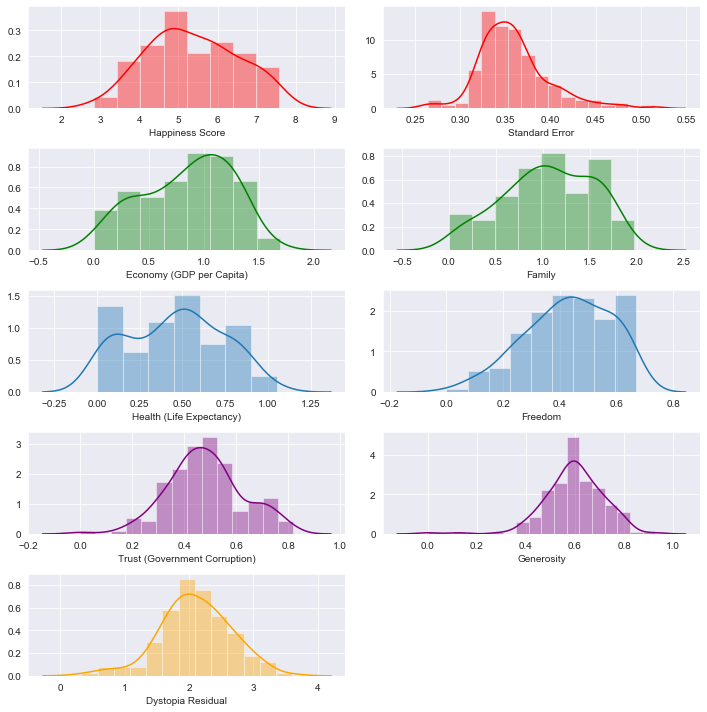

In [23]:
#Distribution plot for all the columns of the dataset to understand how our data is skewed and what the kurtosis is for each column
fig,ax = plt.subplots(5,2,figsize = (10,10))
fig.delaxes(ax[-1,-1])

sns.distplot(df_2015['Happiness Score'],ax = ax[0,0],color = 'Red')
sns.distplot(df_2015['Standard Error'],ax = ax[0,1],color = 'Red')
sns.distplot(df_2015['Economy (GDP per Capita)'],ax = ax[1,0],color = 'Green')
sns.distplot(df_2015['Family'],ax = ax[1,1],color = 'Green')
sns.distplot(df_2015['Health (Life Expectancy)'],ax = ax[2,0])
sns.distplot(df_2015['Freedom'],ax = ax[2,1])
sns.distplot(df_2015['Trust (Government Corruption)'],ax = ax[3,0],color = 'Purple')
sns.distplot(df_2015['Generosity'],ax = ax[3,1],color= 'Purple')
sns.distplot(df_2015['Dystopia Residual'],ax = ax[4,0],color = 'Orange')

plt.tight_layout();

In [24]:
df_2015.drop(['Happiness Rank','Country'],axis = 1, inplace = True)

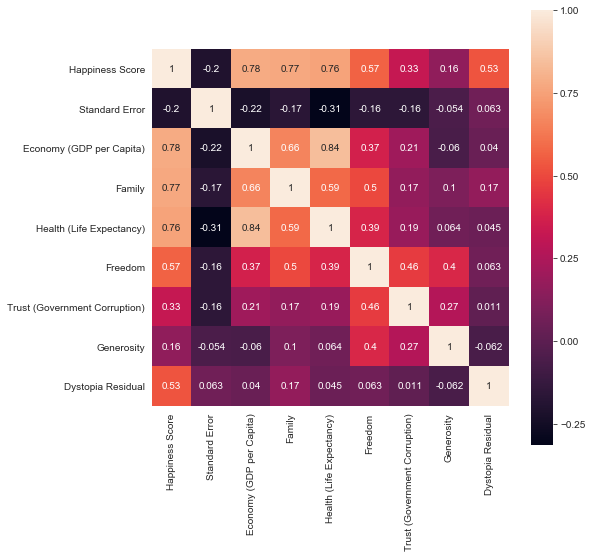

In [25]:
plt.figure(figsize = (8,8))
sns.heatmap(df_2015.corr(),annot = True,square = True);

## Machine Learning

In [26]:
x = df_2015[['Region', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual']]
y = df_2015['Happiness Score']

In [27]:
labelencoder = LabelEncoder()
x['Region'] = labelencoder.fit_transform(x['Region'])
onehotencoder = OneHotEncoder(categorical_features = [0])
x = onehotencoder.fit_transform(x).toarray()

C:\Users\obero\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning:

The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.



In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [29]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
pred = regressor.predict(X_test)
pred

array([4.19622113, 6.0691825 , 5.72727651, 4.39155328, 6.44982872,
       3.70546323, 5.10837673, 3.82807366, 6.92256172, 5.42981793,
       4.43674663, 5.01661454, 6.16329862, 5.60321493, 5.85851799,
       5.02542633, 5.13329737, 5.65859288, 7.39728134, 7.6306343 ,
       6.48638811, 5.01932415, 6.05693069, 5.8201405 , 3.11378245,
       6.53258481, 4.22562115, 4.90984854, 3.46426546, 3.10435168,
       3.86351528, 4.93482436, 4.82319315, 5.99995229, 5.55728542,
       4.68341065, 4.31455145, 5.51252746, 6.84276939, 4.66607754,
       3.87454627, 4.42550182, 5.10908654, 4.13797319, 3.9513564 ,
       4.98191666, 4.73916387, 6.02774845])

In [31]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.07781761915763642
MSE: 0.01285776247693427
RMSE: 0.11339207413630932


In [32]:
regressor.score(X_train,y_train)

0.9940845604771176

In [33]:
regressor.score(X_test,y_test)

0.9888082938469143

In [34]:
df_2015.columns

Index(['Region', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')